DECISION TREE algorithm

In [ ]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from google.colab import files

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Upload dataset
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving sentiment_analysis_100_reviews_v2.csv to sentiment_analysis_100_reviews_v2 (2).csv


In [ ]:
# Display dataset sample
print("Dataset Sample:\n", df.head())

Dataset Sample:
    Review_ID                                     Text Sentiment    Source
0          1         Would buy again, very satisfied.  Negative  Facebook
1          2     Absolutely love it! Works perfectly.   Neutral  Flipkart
2          3       Highly recommend! Amazing quality.  Positive    Amazon
3          4  Late delivery, but the product is okay.  Negative   Twitter
4          5      Arrived damaged, very disappointed.   Neutral  Flipkart


In [ ]:
# Check class distribution
print("Class Distribution Before Balancing:\n", df['Sentiment'].value_counts())

Class Distribution Before Balancing:
 Sentiment
Positive    34
Negative    33
Neutral     33
Name: count, dtype: int64


In [ ]:
# Ensure 'Sentiment' column has valid labels
print("Unique Sentiment Labels:", df['Sentiment'].unique())

Unique Sentiment Labels: ['Negative' 'Neutral' 'Positive']


In [ ]:
# Text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [ ]:
# Apply preprocessing
df['cleaned_review'] = df['Text'].apply(preprocess_text)

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['Sentiment'], test_size=0.2, stratify=df['Sentiment'], random_state=42)

In [ ]:
# Convert text data to numerical vectors
vectorizer = TfidfVectorizer(max_features=7000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Handle Class Imbalance
oversampler = RandomOverSampler(random_state=42)
X_train_tfidf, y_train = oversampler.fit_resample(X_train_tfidf, y_train)
print("Class Distribution After Balancing:\n", pd.Series(y_train).value_counts())

Class Distribution After Balancing:
 Sentiment
Positive    27
Neutral     27
Negative    27
Name: count, dtype: int64


In [ ]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight="balanced", random_state=42)
clf.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, random_state=42)

In [ ]:
# Predict on test set
y_pred = clf.predict(X_test_tfidf)

In [ ]:
# Print accuracy and classification report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

    Negative       0.29      0.29      0.29         7
     Neutral       0.50      0.17      0.25         6
    Positive       0.45      0.71      0.56         7

    accuracy                           0.40        20
   macro avg       0.41      0.39      0.36        20
weighted avg       0.41      0.40      0.37        20



In [ ]:
# Generate and visualize confusion matrix
labels = sorted(df['Sentiment'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

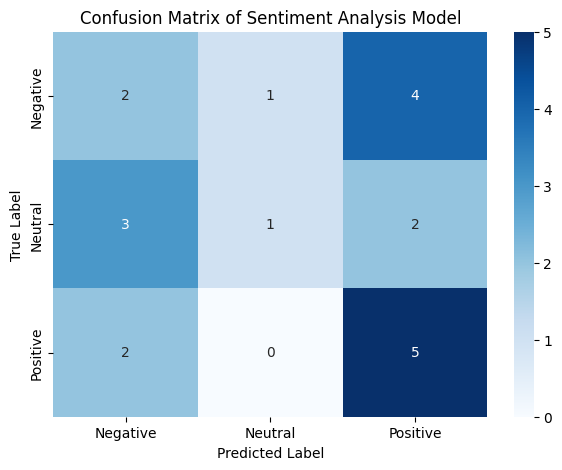

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Sentiment Analysis Model")
plt.show()

In [ ]:
# Predict new reviews
new_reviews = [
    "Worst product!.",
    "Good quality, Loved it.",
    "Decent quality",
    "Excellent service and fast delivery.",
    "Not satisfied with the product.",
    "Amazing phone with great battery life"
]

In [ ]:
# Preprocess new reviews
new_reviews_cleaned = [preprocess_text(review) for review in new_reviews]
new_reviews_tfidf = vectorizer.transform(new_reviews_cleaned)

In [ ]:
# Make predictions
predictions = clf.predict(new_reviews_tfidf)

In [ ]:
# Display results
for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: {review} -> Sentiment: {sentiment}")

Review: Worst product!. -> Sentiment: Negative
Review: Good quality, Loved it. -> Sentiment: Positive
Review: Decent quality -> Sentiment: Positive
Review: Excellent service and fast delivery. -> Sentiment: Positive
Review: Not satisfied with the product. -> Sentiment: Negative
Review: Amazing phone with great battery life -> Sentiment: Positive


svm algorithm ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Install required libraries
!pip install nltk scikit-learn pandas matplotlib seaborn imblearn

In [ ]:
# Import necessary libraries
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from google.colab import files

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Upload dataset
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving sentiment_analysis_100_reviews_v2.csv to sentiment_analysis_100_reviews_v2.csv


In [ ]:
# Display the first few rows of the dataset
print("Dataset Sample:\n", df.head())

Dataset Sample:
    Review_ID                                     Text Sentiment    Source
0          1         Would buy again, very satisfied.  Negative  Facebook
1          2     Absolutely love it! Works perfectly.   Neutral  Flipkart
2          3       Highly recommend! Amazing quality.  Positive    Amazon
3          4  Late delivery, but the product is okay.  Negative   Twitter
4          5      Arrived damaged, very disappointed.   Neutral  Flipkart


In [ ]:
# Check class distribution
print("Class Distribution Before Balancing:\n", df['Sentiment'].value_counts())

Class Distribution Before Balancing:
 Sentiment
Positive    34
Negative    33
Neutral     33
Name: count, dtype: int64


In [ ]:
# Ensure 'Sentiment' column has valid labels
print("Unique Sentiment Labels:", df['Sentiment'].unique())

Unique Sentiment Labels: ['Negative' 'Neutral' 'Positive']


In [ ]:
# Text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = " ".join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

In [ ]:
# Apply preprocessing to dataset
df['cleaned_review'] = df['Text'].apply(preprocess_text)

In [ ]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['Sentiment'], test_size=0.2, stratify=df['Sentiment'], random_state=42)

In [ ]:
# Convert text data to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=7000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Handle Class Imbalance
oversampler = RandomOverSampler(random_state=42)
X_train_tfidf, y_train = oversampler.fit_resample(X_train_tfidf, y_train)
print("Class Distribution After Balancing:\n", pd.Series(y_train).value_counts())

Class Distribution After Balancing:
 Sentiment
Positive    27
Neutral     27
Negative    27
Name: count, dtype: int64


In [ ]:
# Train SVM Model
clf = SVC(kernel='linear', class_weight='balanced', random_state=42)
clf.fit(X_train_tfidf, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
# Predict on training data
y_train_pred = clf.predict(X_train_tfidf)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Accuracy: 0.5555555555555556


In [ ]:
# Predict on test set
y_pred = clf.predict(X_test_tfidf)

In [ ]:
# Print accuracy and classification report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

    Negative       0.50      0.29      0.36         7
     Neutral       0.50      0.17      0.25         6
    Positive       0.36      0.71      0.48         7

    accuracy                           0.40        20
   macro avg       0.45      0.39      0.36        20
weighted avg       0.45      0.40      0.37        20



In [ ]:
# Generate and visualize confusion matrix
labels = sorted(df['Sentiment'].unique())  # Ensure correct sentiment labels
cm = confusion_matrix(y_test, y_pred, labels=labels)

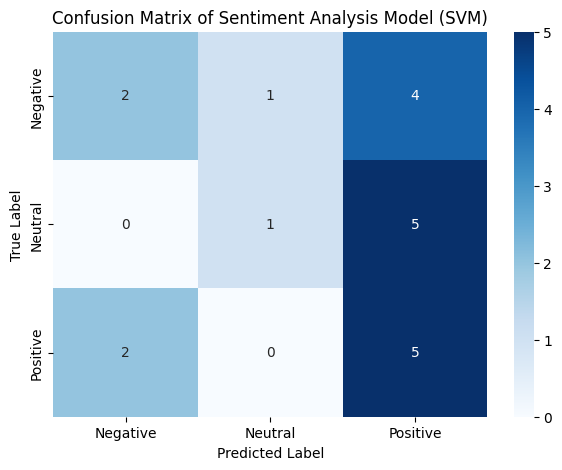

In [ ]:
plt.figure(figsize=(7, 5))  # Adjust figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Sentiment Analysis Model (SVM)")
plt.show()

In [ ]:
# Predict new reviews
new_reviews = [
    "Good quality.",
    "Late delivery.",
    "Okay product.",
    "worst Product.",
    "Very happy.",
    "Great phone."
]

In [ ]:
# Preprocess new reviews before prediction
new_reviews_cleaned = [preprocess_text(review) for review in new_reviews]
new_reviews_tfidf = vectorizer.transform(new_reviews_cleaned)

In [ ]:
# Make predictions
predictions = clf.predict(new_reviews_tfidf)

In [ ]:
# Display results
for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: {review} -> Sentiment: {sentiment}")

Review: Good quality. -> Sentiment: Positive
Review: Late delivery. -> Sentiment: Negative
Review: Okay product. -> Sentiment: Positive
Review: worst Product. -> Sentiment: Negative
Review: Very happy. -> Sentiment: Positive
Review: Great phone. -> Sentiment: Positive


Logistic Regression--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# ✅ Install required libraries
!pip install nltk scikit-learn pandas matplotlib seaborn imblearn

In [ ]:
# ✅ Import necessary libraries
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from google.colab import files

In [ ]:
# ✅ Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# ✅ Upload dataset
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving sentiment_analysis_100_reviews_v2.csv to sentiment_analysis_100_reviews_v2.csv


In [ ]:
# ✅ Display the first few rows of the dataset
print("Dataset Sample:\n", df.head())

Dataset Sample:
    Review_ID                                     Text Sentiment    Source
0          1         Would buy again, very satisfied.  Negative  Facebook
1          2     Absolutely love it! Works perfectly.   Neutral  Flipkart
2          3       Highly recommend! Amazing quality.  Positive    Amazon
3          4  Late delivery, but the product is okay.  Negative   Twitter
4          5      Arrived damaged, very disappointed.   Neutral  Flipkart


In [ ]:
# ✅ Check class distribution
print("Class Distribution Before Balancing:\n", df['Sentiment'].value_counts())

Class Distribution Before Balancing:
 Sentiment
Positive    34
Negative    33
Neutral     33
Name: count, dtype: int64


In [ ]:
# ✅ Ensure 'Sentiment' column has valid labels
print("Unique Sentiment Labels:", df['Sentiment'].unique())

Unique Sentiment Labels: ['Negative' 'Neutral' 'Positive']


In [ ]:
# ✅ Text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = " ".join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

In [ ]:
# ✅ Apply preprocessing to dataset
df['cleaned_review'] = df['Text'].apply(preprocess_text)

In [ ]:
# ✅ Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['Sentiment'], test_size=0.2, stratify=df['Sentiment'], random_state=42)

In [ ]:
# ✅ Convert text data to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=7000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# ✅ Handle Class Imbalance
oversampler = RandomOverSampler(random_state=42)
X_train_tfidf, y_train = oversampler.fit_resample(X_train_tfidf, y_train)
print("Class Distribution After Balancing:\n", pd.Series(y_train).value_counts())

Class Distribution After Balancing:
 Sentiment
Positive    27
Neutral     27
Negative    27
Name: count, dtype: int64


In [ ]:
# ✅ Train Logistic Regression Model
clf = LogisticRegression(max_iter=500, class_weight="balanced", random_state=42)
clf.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

In [ ]:
# ✅ Predict on training data
y_train_pred = clf.predict(X_train_tfidf)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Class Distribution:\n", pd.Series(y_train_pred).value_counts())

Training Accuracy: 0.5555555555555556
Training Class Distribution:
 Positive    31
Neutral     27
Negative    23
Name: count, dtype: int64


In [ ]:
# ✅ Predict on test set
y_pred = clf.predict(X_test_tfidf)

In [ ]:
# ✅ Print accuracy and classification report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

    Negative       0.50      0.29      0.36         7
     Neutral       0.50      0.17      0.25         6
    Positive       0.36      0.71      0.48         7

    accuracy                           0.40        20
   macro avg       0.45      0.39      0.36        20
weighted avg       0.45      0.40      0.37        20



In [ ]:
# ✅ Generate and visualize confusion matrix
labels = sorted(df['Sentiment'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

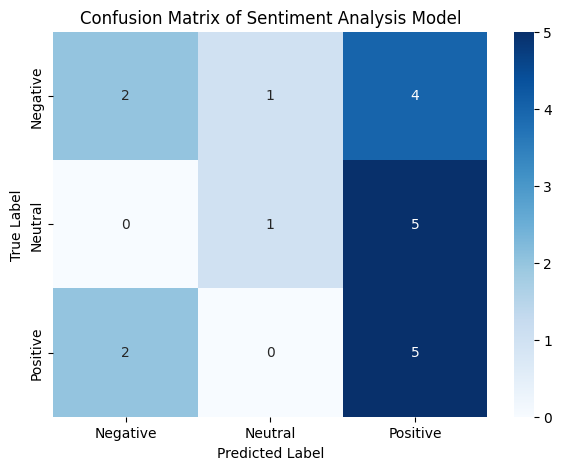

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Sentiment Analysis Model")
plt.show()

In [ ]:
# ✅ Predict new reviews
new_reviews = [
    "Late delivery.",
    "Worst experience ever!",
    "Decent quality.",
    "Excellent service and fast delivery.",
    "Not satisfied with the product.",
    "Amazing phone with great battery life"
]

In [ ]:
# ✅ Preprocess new reviews before prediction
new_reviews_cleaned = [preprocess_text(review) for review in new_reviews]
new_reviews_tfidf = vectorizer.transform(new_reviews_cleaned)

In [ ]:
# ✅ Make predictions
predictions = clf.predict(new_reviews_tfidf)

In [ ]:
# ✅ Display results
for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: {review} -> Sentiment: {sentiment}")

Review: Late delivery. -> Sentiment: Negative
Review: Worst experience ever! -> Sentiment: Negative
Review: Decent quality. -> Sentiment: Positive
Review: Excellent service and fast delivery. -> Sentiment: Positive
Review: Not satisfied with the product. -> Sentiment: Negative
Review: Amazing phone with great battery life -> Sentiment: Positive


naive bayes --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Install required libraries
!pip install nltk scikit-learn pandas matplotlib seaborn imblearn

In [ ]:
# Import necessary libraries
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from google.colab import files

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Upload dataset
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving sentiment_analysis_100_reviews_v2.csv to sentiment_analysis_100_reviews_v2.csv


In [ ]:
# Display the first few rows of the dataset
print("Dataset Sample:\n", df.head())

Dataset Sample:
    Review_ID                                     Text Sentiment    Source
0          1         Would buy again, very satisfied.  Negative  Facebook
1          2     Absolutely love it! Works perfectly.   Neutral  Flipkart
2          3       Highly recommend! Amazing quality.  Positive    Amazon
3          4  Late delivery, but the product is okay.  Negative   Twitter
4          5      Arrived damaged, very disappointed.   Neutral  Flipkart


In [ ]:
# Check class distribution
print("Class Distribution Before Balancing:\n", df['Sentiment'].value_counts())

Class Distribution Before Balancing:
 Sentiment
Positive    34
Negative    33
Neutral     33
Name: count, dtype: int64


In [ ]:
# Ensure 'Sentiment' column has valid labels
print("Unique Sentiment Labels:", df['Sentiment'].unique())

Unique Sentiment Labels: ['Negative' 'Neutral' 'Positive']


In [ ]:
# Text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = " ".join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

In [ ]:
# Apply preprocessing to dataset
df['cleaned_review'] = df['Text'].apply(preprocess_text)

In [ ]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['Sentiment'], test_size=0.2, stratify=df['Sentiment'], random_state=42)

In [ ]:
# Convert text data to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=7000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Handle Class Imbalance
oversampler = RandomOverSampler(random_state=42)
X_train_tfidf, y_train = oversampler.fit_resample(X_train_tfidf, y_train)
print("Class Distribution After Balancing:\n", pd.Series(y_train).value_counts())

Class Distribution After Balancing:
 Sentiment
Positive    27
Neutral     27
Negative    27
Name: count, dtype: int64


In [ ]:
# Train Naïve Bayes Model
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [ ]:
# Predict on training data
y_train_pred = clf.predict(X_train_tfidf)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Accuracy: 0.5555555555555556


In [ ]:
# Predict on test set
y_pred = clf.predict(X_test_tfidf)

In [ ]:
# Print accuracy and classification report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.35
Classification Report:
               precision    recall  f1-score   support

    Negative       0.29      0.29      0.29         7
     Neutral       0.40      0.33      0.36         6
    Positive       0.38      0.43      0.40         7

    accuracy                           0.35        20
   macro avg       0.35      0.35      0.35        20
weighted avg       0.35      0.35      0.35        20



In [ ]:
# Generate and visualize confusion matrix
labels = sorted(df['Sentiment'].unique())  # Ensure correct sentiment labels
cm = confusion_matrix(y_test, y_pred, labels=labels)

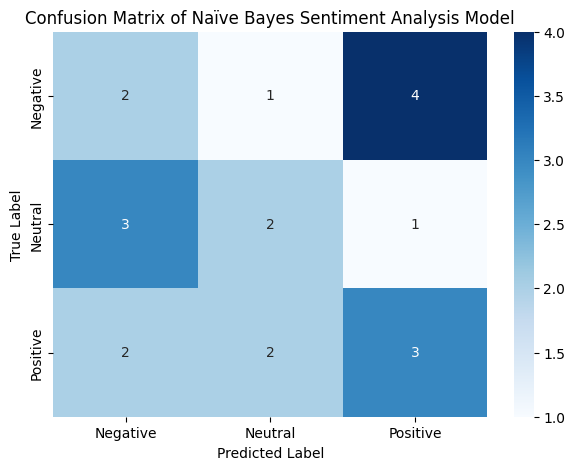

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Naïve Bayes Sentiment Analysis Model")
plt.show()

In [ ]:
# Predict new reviews
new_reviews = [
    "Late delivery.",
    "Bad experience!",
    "overpriced.",
    "Excellent service and fast delivery.",
    "Not satisfied with the product.",
    "Amazing phone with great battery life"
]

In [ ]:
# Preprocess new reviews before prediction
new_reviews_cleaned = [preprocess_text(review) for review in new_reviews]
new_reviews_tfidf = vectorizer.transform(new_reviews_cleaned)

In [ ]:
# Make predictions
predictions = clf.predict(new_reviews_tfidf)

In [ ]:
# Display results
for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: {review} -> Sentiment: {sentiment}")

Review: Late delivery. -> Sentiment: Negative
Review: Bad experience! -> Sentiment: Negative
Review: overpriced. -> Sentiment: Negative
Review: Excellent service and fast delivery. -> Sentiment: Positive
Review: Not satisfied with the product. -> Sentiment: Negative
Review: Amazing phone with great battery life -> Sentiment: Positive
